In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv('data.csv')
#  Tampilkan 5 data pertama
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [32]:
df.drop(["street", "city", "statezip", "country"], axis=1, inplace=True)
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 503.2+ KB


In [33]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['price', 'sqft_living', 'sqft_lot']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(4600, 3)

In [40]:
data_raw = pd.DataFrame(df_scale)
data.columns = ['price', 'sqft_living', 'sqft_lot']
data = pd.DataFrame(data_raw, index=range(1,1000))
data = data.rename(columns={0:'price', 1:'sqft_living', 2:'sqft_lot'})

data_cluster = data.copy()
data.head()

,price,sqft_living,sqft_lot
1,3.249598,1.568528,-0.161718
2,-0.372424,-0.217367,-0.080978
3,-0.234071,-0.144686,-0.190145
4,-0.003482,-0.206984,-0.121306
5,-0.109908,-1.307594,-0.236131


Text(0, 0.5, 'Inertia')

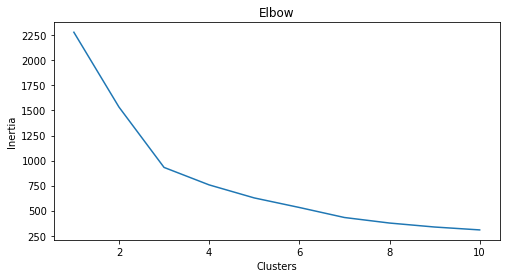

In [41]:
# Menentukan jumlah K
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [36]:
## Melatih model
# Create Model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,price,sqft_living,sqft_lot,cluster_kmeans3,cluster_kmeans4
1,3.249598,1.568528,-0.161718,1,1
2,-0.372424,-0.217367,-0.080978,0,0
3,-0.234071,-0.144686,-0.190145,0,0
4,-0.003482,-0.206984,-0.121306,0,0
5,-0.109908,-1.307594,-0.236131,0,0
...,...,...,...,...,...
995,2.213721,2.409560,0.058541,1,1
996,-0.447011,-1.276445,-0.190981,0,0
997,0.351182,0.654814,-0.113697,1,2
998,0.972087,0.260256,-0.221973,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


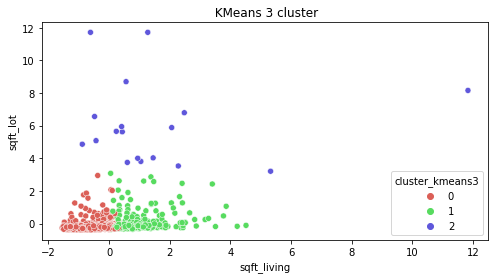

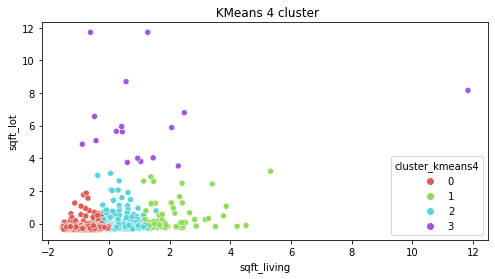

In [37]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['sqft_living'], data_cluster['sqft_lot'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['sqft_living'], data_cluster['sqft_lot'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

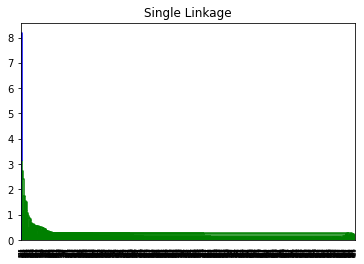

In [39]:
# single linkage
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

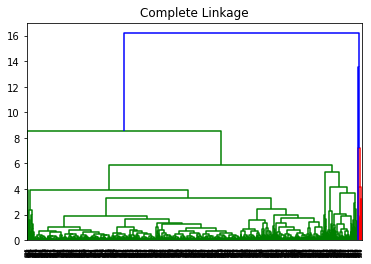

In [42]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [44]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,price,sqft_living,sqft_lot,cluster_hierarchy
1,3.249598,1.568528,-0.161718,0
2,-0.372424,-0.217367,-0.080978,0
3,-0.234071,-0.144686,-0.190145,0
4,-0.003482,-0.206984,-0.121306,0
5,-0.109908,-1.307594,-0.236131,0
...,...,...,...,...
995,2.213721,2.409560,0.058541,0
996,-0.447011,-1.276445,-0.190981,0
997,0.351182,0.654814,-0.113697,0
998,0.972087,0.260256,-0.221973,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Hierarchical Clustering')

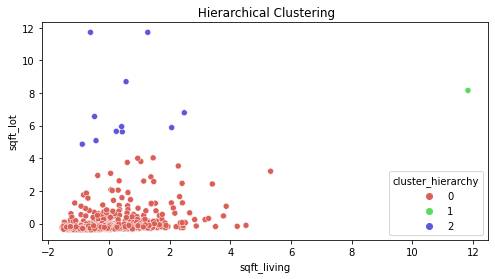

In [47]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['sqft_living'], data_cluster['sqft_lot'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title(' Hierarchical Clustering')

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)
print(db.labels_)

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [50]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,price,sqft_living,sqft_lot,cluster_hierarchy,cluster_dbscan
1,3.249598,1.568528,-0.161718,0,-1
2,-0.372424,-0.217367,-0.080978,0,0
3,-0.234071,-0.144686,-0.190145,0,0
4,-0.003482,-0.206984,-0.121306,0,0
5,-0.109908,-1.307594,-0.236131,0,0
...,...,...,...,...,...
995,2.213721,2.409560,0.058541,0,0
996,-0.447011,-1.276445,-0.190981,0,0
997,0.351182,0.654814,-0.113697,0,0
998,0.972087,0.260256,-0.221973,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' DBSCAN clustering')

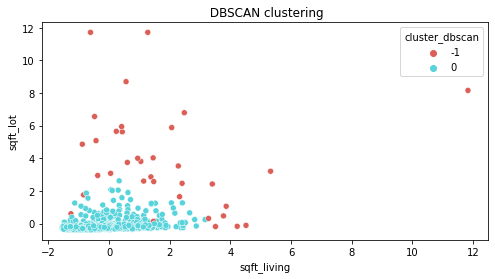

In [52]:
## Tampilkan Plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['sqft_living'], data_cluster['sqft_lot'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',2))
plt.title(' DBSCAN clustering')